In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:

# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones_dendro_dt_0.6/"
# DONOR = 0
# dendroThresh=0.6

#clones_meta = '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/clones_summary.csv'
#clones_indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
#clone_sizes_in_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/minCellConds_1/clone_sizes.csv"
#AF_INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/clones/variants_init/knn/kparam_30/donor0/"

INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique/clones/variants_init/knn/kparam_30"
OUTDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro"
DONOR = 1


# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dt_0.6"
# DONOR = 1
#dendroThresh = 0.6

verbose=False

mt_ref="/data/Mito_Trace/data/processed/genomes/mtMasked/GRCh38_MT_blacklist_A2_2020/chrM.fasta"

In [3]:

import mplh.cluster_help as ch
import mplh.fig_utils as fu

from os.path import join, exists, dirname
from glob import glob
import pickle
import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)
import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})
import scipy
from itertools import combinations
#from src.utils import utils  as ut

fig_utils from mplh
0.5.6


In [5]:
from src.utils.dendro_clust import run_dynamic
import src.utils.variant_utils as vu
import src.utils.dendro_clust as dc



In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
out_f = join(OUTDIR, f"donor{DONOR}")

### Load cells_meta 
### Create clones_meta - get number of cells in a clone and donor

In [7]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep="\t", index_col=0)
cells_meta["lineage"] = cells_meta.apply(lambda x: f'{x["donor"]}_{x["lineage"]}', axis=1)
cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,cluster_labels
Flt3l_AAACGAACACAGCCAC-1,Flt3l,2854,2854,10589,1294,41,31,456,2764,6003,...,9,3722,2998,AAACGAACACAGCCAC-1_Flt3l,Flt3l_AAACGAACACAGCCAC-1,0_27,0,Flt3l,0_27,9
Flt3l_AAACGAATCGCTGATA-1,Flt3l,1521,1521,6172,1092,29,21,296,1178,3556,...,3,2029,1760,AAACGAATCGCTGATA-1_Flt3l,Flt3l_AAACGAATCGCTGATA-1,0_19,0,Flt3l,0_19,3
Flt3l_AAACTCGAGATGTTCC-1,Flt3l,1223,1223,4318,548,13,13,212,1050,2482,...,1,1596,1442,AAACTCGAGATGTTCC-1_Flt3l,Flt3l_AAACTCGAGATGTTCC-1,0_1,0,Flt3l,0_1,1
Flt3l_AAACTCGAGTCTCCAA-1,Flt3l,2626,2626,9545,1407,34,25,514,1931,5634,...,1,3373,2791,AAACTCGAGTCTCCAA-1_Flt3l,Flt3l_AAACTCGAGTCTCCAA-1,0_20,0,Flt3l,0_20,1
Flt3l_AAACTCGTCTTACGGA-1,Flt3l,2577,2577,8882,1154,32,19,495,1811,5371,...,4,3144,2629,AAACTCGTCTTACGGA-1_Flt3l,Flt3l_AAACTCGTCTTACGGA-1,0_15,0,Flt3l,0_15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGGCCGTATATGGA-1,Input,7710,7710,38155,13305,118,152,1558,10362,12660,...,2,8630,5610,TTTGGCCGTATATGGA-1_Input,Input_TTTGGCCGTATATGGA-1,1_17,1,Input,1_17,2
Input_TTTGGCCTCGGCTATA-1,Input,6260,6260,33678,10327,133,126,1222,9544,12326,...,7,8038,5343,TTTGGCCTCGGCTATA-1_Input,Input_TTTGGCCTCGGCTATA-1,1_14,1,Input,1_14,7
Input_TTTGTGTAGGTTGTTC-1,Input,3466,3466,28547,5288,99,92,593,16793,5682,...,5,3661,2933,TTTGTGTAGGTTGTTC-1_Input,Input_TTTGTGTAGGTTGTTC-1,1_2,1,Input,1_2,5
Input_TTTGTGTCAAGCCAGA-1,Input,2635,2635,19591,3883,37,67,496,10265,4843,...,2,2945,2326,TTTGTGTCAAGCCAGA-1_Input,Input_TTTGTGTCAAGCCAGA-1,1_27,1,Input,1_27,2


In [8]:
clones_meta_df = pd.DataFrame(cells_meta.groupby("lineage").size(), columns=["size"]) #, index=["size"])
clones_meta_df["donor"] = [x.split("_")[0] for x in clones_meta_df.index]
clones_meta_df["donor"] = clones_meta_df["donor"].astype(int)
clones_meta_df

curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR].copy()
# cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR].copy()

In [9]:
# curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR].set_index("lineage")
# curr_clones

## Load AF and DP

In [10]:
af_indir = INDIR #join(AF_INDIR) #, "sc_af", f"donor{DONOR}")
AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t").transpose()
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t").transpose()


### Functions to get mean and median

In [11]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

### Calculate clone-barcode mean

In [12]:
AF_df.head()

,AAACGAACACAGCCAC-1_Flt3l,AAACGAATCGCTGATA-1_Flt3l,AAACTCGAGATGTTCC-1_Flt3l,AAACTCGAGTCTCCAA-1_Flt3l,AAACTCGTCTTACGGA-1_Flt3l,AAACTGCCAAACCTAC-1_Flt3l,AAACTGCCAGTTACAC-1_Flt3l,AAACTGCGTTTGCCCT-1_Flt3l,AAAGATGAGCTACGTT-1_Flt3l,AAAGATGAGGAGAACA-1_Flt3l,...,TTTGAGGCACCGAAAG-1_Input,TTTGAGGGTCATAAGA-1_Input,TTTGCGCAGTGTCGGA-1_Input,TTTGGCCAGAGGAATG-1_Input,TTTGGCCAGCTATCGT-1_Input,TTTGGCCGTATATGGA-1_Input,TTTGGCCTCGGCTATA-1_Input,TTTGTGTAGGTTGTTC-1_Input,TTTGTGTCAAGCCAGA-1_Input,TTTGTGTCATAGCCAT-1_Input
10559G,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11251G,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11453A,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11719A,0.0,0.0,0.0,0.0,0.0,0.086957,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11812G,0.0,0.0,0.0,0.0,0.0,0.000000,0.181818,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
(AF_df == 0).all().sum()

0

In [14]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df.fillna(0))
mean_af = mean_af.loc[~((mean_af == 0).all(axis=1)),~((mean_af == 0).all(axis=0))]

mean_af

,1949A,3109C,10397G,11761T,13188T,15297C,16355T,16362C,196C,204C,2442C,2623G,3847C,58C,64T,8292A,8461T
lineage,,,,,,,,,,,,,,,,,
1_14,0.001732,0.045564,0.000955,0.001682,0.003824,0.000000,0.000545,0.000416,0.000956,0.000822,0.002160,0.001920,0.000426,0.000579,0.000712,0.001374,0.002165
1_15,0.002636,0.002416,0.004688,0.083806,0.006611,0.003424,0.001529,0.000400,0.002179,0.000242,0.011985,0.000751,0.005830,0.002606,0.003571,0.003375,0.011234
1_16,0.000000,0.001417,0.002359,0.002057,0.004409,0.001702,0.000417,0.001374,0.000000,0.000000,0.093946,0.003296,0.001164,0.004504,0.001862,0.004681,0.007766
1_17,0.000279,0.001564,0.002005,0.006095,0.004895,0.000000,0.000000,0.000752,0.001550,0.000673,0.004621,0.000085,0.085269,0.004168,0.002412,0.006030,0.005388
1_18,0.000784,0.004921,0.006080,0.012538,0.006666,0.000169,0.006330,0.005326,0.115796,0.275936,0.006065,0.000793,0.024980,0.003452,0.011109,0.004880,0.005653
1_19,0.001514,0.003659,0.123123,0.005359,0.013115,0.000000,0.003163,0.002332,0.002462,0.003980,0.005407,0.000000,0.005507,0.003995,0.003790,0.009799,0.001827
1_2,0.001036,0.047726,0.002300,0.002292,0.001808,0.004769,0.000678,0.000805,0.000631,0.000429,0.001381,0.002237,0.002391,0.001176,0.000628,0.001993,0.002323
1_21,0.000110,0.008687,0.006468,0.010305,0.012892,0.000000,0.143714,0.152265,0.003478,0.003273,0.013745,0.000000,0.008979,0.003354,0.004825,0.011356,0.011804
1_23,0.000918,0.002759,0.001348,0.004910,0.088353,0.001897,0.001145,0.001338,0.000620,0.000445,0.002772,0.003692,0.001566,0.000508,0.000471,0.001662,0.002648


In [15]:
mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
mean_dp = mean_dp.loc[mean_af.index, mean_af.columns]


In [16]:
anno = mean_af.reset_index()[["lineage"]]

# Remove clones that have all 0
# print('mean_af shape', mean_af.shape)
# mean_af = mean_af.loc[~((mean_af==0).all(axis=1))]
# curr_clones = curr_clones.loc[mean_af.index]
# print('mean_af shape after rm 0', mean_af.shape)


#mean_dp = mean_dp.reset_index(drop=True)
anno_dp = mean_dp.reset_index()[["lineage"]]
na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

if not (na_mean_af.shape[0] == 0):
    print('na shape', na_mean_af.shape)
    na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
    na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
    na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
    na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
else:
    na_anno = anno
    na_concat = mean_af.reset_index(drop=True)
    na_dp_concat = mean_dp
     
mean_af  

,1949A,3109C,10397G,11761T,13188T,15297C,16355T,16362C,196C,204C,2442C,2623G,3847C,58C,64T,8292A,8461T
lineage,,,,,,,,,,,,,,,,,
1_14,0.001732,0.045564,0.000955,0.001682,0.003824,0.000000,0.000545,0.000416,0.000956,0.000822,0.002160,0.001920,0.000426,0.000579,0.000712,0.001374,0.002165
1_15,0.002636,0.002416,0.004688,0.083806,0.006611,0.003424,0.001529,0.000400,0.002179,0.000242,0.011985,0.000751,0.005830,0.002606,0.003571,0.003375,0.011234
1_16,0.000000,0.001417,0.002359,0.002057,0.004409,0.001702,0.000417,0.001374,0.000000,0.000000,0.093946,0.003296,0.001164,0.004504,0.001862,0.004681,0.007766
1_17,0.000279,0.001564,0.002005,0.006095,0.004895,0.000000,0.000000,0.000752,0.001550,0.000673,0.004621,0.000085,0.085269,0.004168,0.002412,0.006030,0.005388
1_18,0.000784,0.004921,0.006080,0.012538,0.006666,0.000169,0.006330,0.005326,0.115796,0.275936,0.006065,0.000793,0.024980,0.003452,0.011109,0.004880,0.005653
1_19,0.001514,0.003659,0.123123,0.005359,0.013115,0.000000,0.003163,0.002332,0.002462,0.003980,0.005407,0.000000,0.005507,0.003995,0.003790,0.009799,0.001827
1_2,0.001036,0.047726,0.002300,0.002292,0.001808,0.004769,0.000678,0.000805,0.000631,0.000429,0.001381,0.002237,0.002391,0.001176,0.000628,0.001993,0.002323
1_21,0.000110,0.008687,0.006468,0.010305,0.012892,0.000000,0.143714,0.152265,0.003478,0.003273,0.013745,0.000000,0.008979,0.003354,0.004825,0.011356,0.011804
1_23,0.000918,0.002759,0.001348,0.004910,0.088353,0.001897,0.001145,0.001338,0.000620,0.000445,0.002772,0.003692,0.001566,0.000508,0.000471,0.001662,0.002648


In [17]:
# Get variant types
variants_df = vu.add_ref_to_variants(variants=mean_af.columns.values,
                                     mt_df=vu.load_mt_ref(mt_ref))

variants_df = vu.type_of_variants(variants_df, to_preproc=False)

### Cluster 

In [18]:
%matplotlib inline
if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):
    #den = dc.dendro_cluster(mean_af, g, d_thresh=0.6)
    
    #clusters, link = run_dynamic(mean_af, metric='euclidean', method="average", minClusterSize=1)
    clusters, link = dc.run_dynamic_hyper(np.sqrt(mean_af))
#     is_comp = False
#     for i in ([3,2,1]):
#         try:
#             clusters, link = run_dynamic(mean_af, metric='cosine', method="complete", 
#                                          minClusterSize=i, deepSplit=3)
#             is_comp = True
#             break
#         except IndexError:
#             print(f'didnt work for {i}')
#     print("min cluster size:", i)
    
#     if not is_comp:
#         print('min size 1 and deepsplit 1')
#         clusters, link = run_dynamic(mean_af, metric='cosine', method="complete", 
#                                      minClusterSize=1, deepSplit=1)
        
    curr_clones["den_clust"] = curr_clones.apply(lambda x: f'C{clusters.loc[x.name, "labels"]}', axis=1)

    size_pvals = dc.cluster_stats(curr_clones, out_f= out_f )

    curr_clones["donor"]= [x.split("_")[0] for x in curr_clones.index]
    curr_clones = curr_clones.loc[mean_af.index]

    # with open(out_f + ".dendrogram_pvals.txt", "w") as f:
    #     #for l in size_pvals:
    #     f.write("\n".join(size_pvals))

    curr_clones


distances
[0.91150 0.92546 0.95577 0.95125 0.93197 0.00769 0.92847 0.87775 0.94007
 0.94483 0.92288 0.94844 0.93405 0.93543 0.99063 0.95249 0.81917 0.83716
 0.93017 0.87832 0.89891 0.90682 0.85590 0.87555 0.85116 0.88429 0.91018
 0.85718 0.85257 0.94199 0.98546 0.91820 0.97228 0.91818 0.94133 0.90802
 0.91464 0.90705 0.86320 0.95044 0.96064 0.89377 0.81611 0.96075 0.96256
 0.89395 0.91213 0.91723 0.93098 0.91568 0.90316 0.85477 0.89693 0.95058
 0.90147 0.92705 0.98094 0.99777 0.93030 0.95917 0.94012 0.96368 0.97058
 0.92552 0.95784 0.97248 0.95990 0.97745 0.98243 0.99677 0.90830 0.91787
 0.87185 0.89503 0.86357 0.00401 0.97747 0.97756 0.94583 0.96791 0.99475
 0.92214 0.91983 0.93106 0.93852 0.89483 0.94499 0.93287 0.93553 0.89170
 0.94790 0.90953 0.91850 0.90236 0.94968 0.97320 0.93775 0.93156 0.98305
 0.99781 0.90862 0.88786 0.93605 0.96368 0.95441 0.95699 0.95913 0.95757
 0.88679 0.91218 0.95367 0.96366 0.97829 0.99308 0.99790 0.88352 0.95137
 0.90303 0.90954 0.98013 0.99619 0.97775 

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Plot with dendro clusters

In [19]:
conditions = cells_meta["condition"].unique()

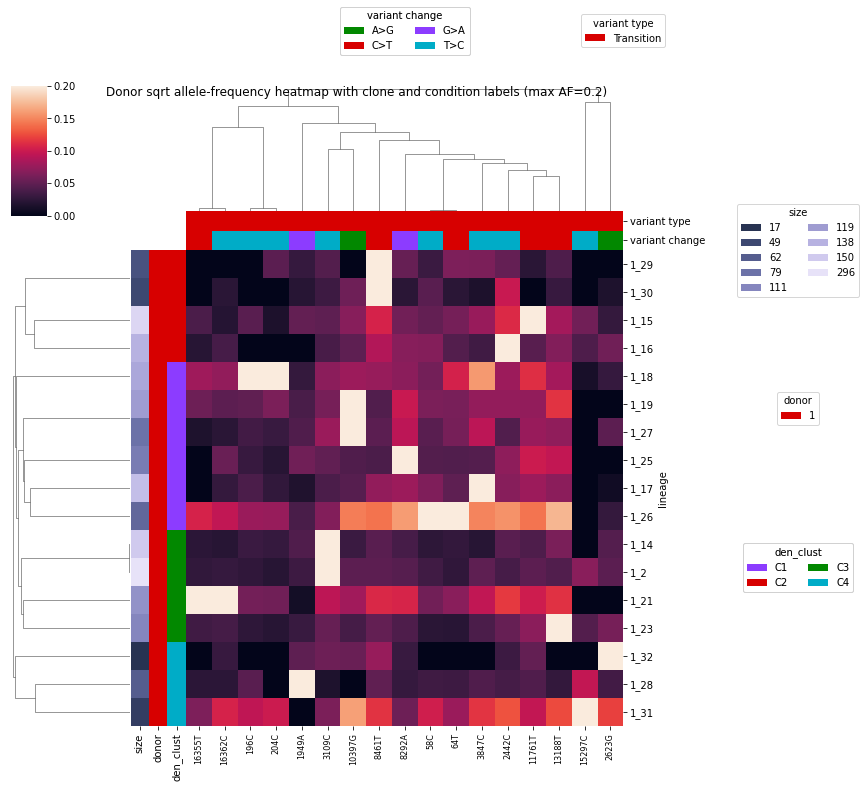

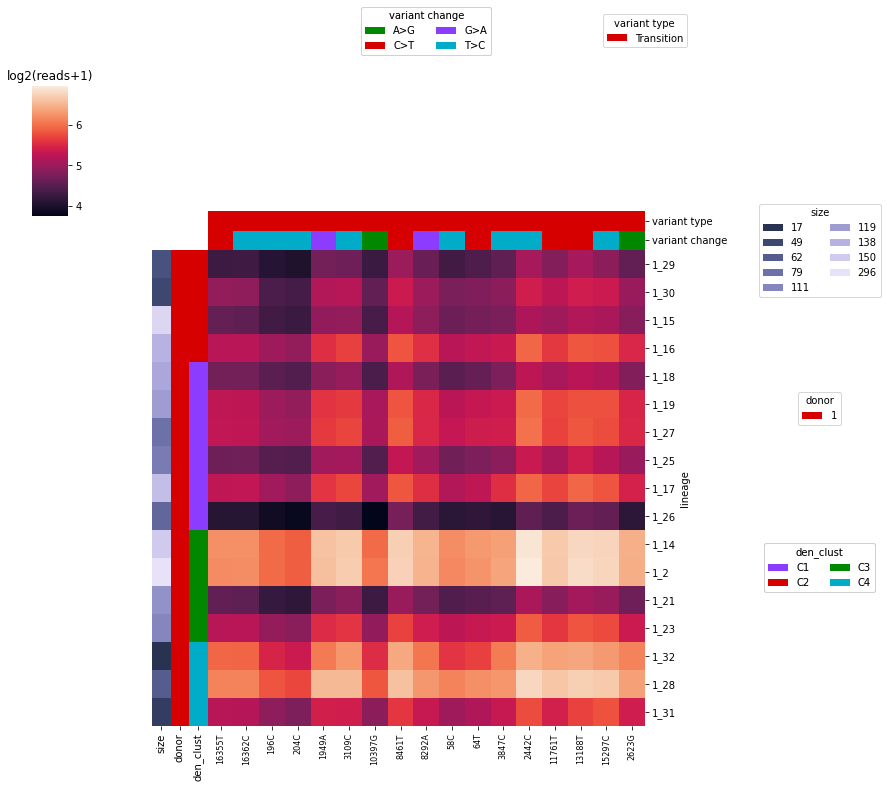

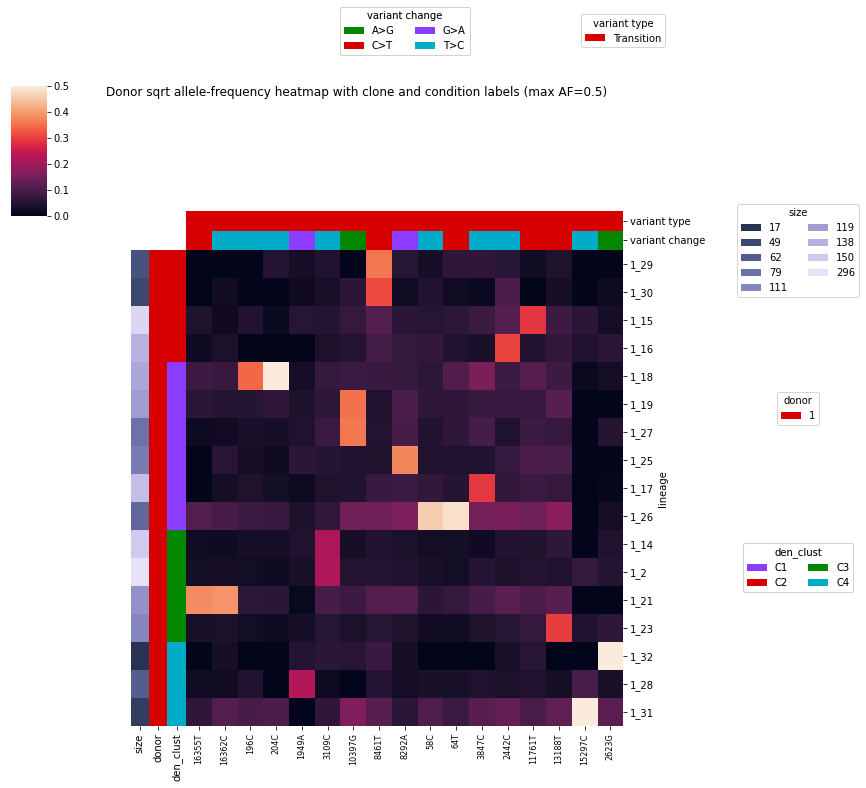

In [20]:
if not (mean_af.shape[0] == 1 or  mean_af.shape[1] == 1 ):
    g = ch.plot_cluster(np.sqrt(mean_af),row_meta=curr_clones, to_row_clust=True, to_col_clust=True,
                        col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                        row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                        vmax=0.2, vmin=0, row_linkage=link, metric="cosine", method="complete")
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.2)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max2.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max2.AF.png",to_svg=True, to_pdf=False)

    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]

    g1d = ch.plot_cluster(mean_dp.iloc[inds, cols], row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                          row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                          col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                         )
    g1d.ax_cbar.set_title("log2(reads+1)")
    fu.helper_save(out_f+".dendro.NoCondition.DP.png", to_svg=True)#, f=g1d.figure)


    mean_af = mean_af.iloc[inds,cols]
    curr_clones = curr_clones.loc[mean_af.index]

    ch.plot_cluster(np.sqrt(mean_af),row_meta=curr_clones, to_row_clust=False, to_col_clust=False,
                    col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                    row_clr_schemes={"size":"sequential","donor":"categorical","den_clust":"categorical"}, 
                    vmax=0.5, vmin=0)
    plt.suptitle("Donor sqrt allele-frequency heatmap with clone and condition labels (max AF=0.5)")
    #fu.helper_save(out_f+"withEnrichmentFoldChange.NoCondition.clust.max5.AF.png",to_pdf=False)
    fu.helper_save(out_f+".dendro.NoCondition.max5.AF.png",to_svg=True, to_pdf=False)



### Save mean_af and curr_clonnes

In [21]:
mean_af.to_csv(out_f+".mean.csv")
curr_clones.to_csv(out_f+".clones_dendro.csv")

In [22]:
out_f

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_unique/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro/donor1'